# Digit recognition problem:
## 0 or 1?

In [105]:
%run src.ipynb

## Loading data from binary numpy files
Each training data includes a 20 by 20 pixel image of a handwritten digit $0$ or $1$, which translates to a 20 by 20 matrix of floating point numbers ranging from 0 (black) to 255 (white) in grayscale. Each matrix is then unrolled (column after column) to make one training example in the matrix X.

In [106]:
X = np.load("../data/digit-recognition-binary/X.npy")
y = np.load("../data/digit-recognition-binary/y.npy")
# We use the first 1000 examples.
X = X[0:1000]
y = y[0:1000].reshape(-1,)

print(f"X.shape = {X.shape}")
print(f"Y.shape = {y.shape}")

X.shape = (1000, 400)
Y.shape = (1000,)


## Display the the corresponding images
Here we convert each training data back to a 20 by 20 matrix and show it on a grayscale.

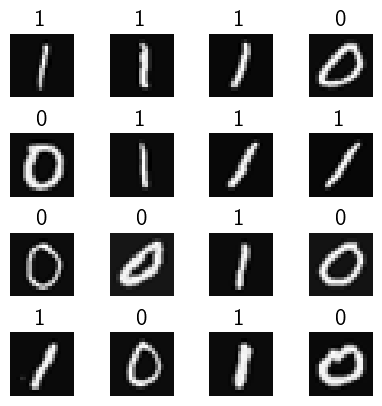

In [107]:
m,_ = X.shape

fig, ax = plt.subplots(4, 4, figsize=(4, 4))
fig.tight_layout(pad=0.1)
for a in ax.flat:
    random_index = np.random.randint(m)# pick a random training data
    X_random = X[random_index].reshape((20,20)).T
    a.imshow(X_random, cmap='gray')
    a.set_title(y[random_index])
    a.set_axis_off()

plt.show()

## Normalize the data using keras

In [108]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X).numpy()

## Creat a neural network
Let's consider 2 hidden layers with, respectively, 25 and 15 sigmoid units, and an output sigmoid layer.

In [109]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation='sigmoid', name = "L1"),
    Dense(units=15, activation='sigmoid', name = "L2"),
    Dense(units=1, activation='sigmoid', name = "L3")
])

W1, b1 = model.get_layer("L1").get_weights()
print(f"W1.shape = {W1.shape}; b1.shape = {b1.shape}")
print(f"W1 =\n{W1}\nb1 =\n {b1}")

model.summary()

W1.shape = (400, 25); b1.shape = (25,)
W1 =
[[-0.03571655  0.01064852  0.04017767 ... -0.06252047 -0.1053552
   0.02344279]
 [-0.10818911 -0.02167725 -0.11028481 ... -0.10907972  0.06017683
   0.06781894]
 [-0.08771377 -0.06342411  0.0568693  ... -0.03633399 -0.02756853
  -0.00633042]
 ...
 [ 0.00862797 -0.10339646  0.00710118 ... -0.0278317  -0.0801939
   0.02450943]
 [ 0.11804977  0.07843395 -0.05879299 ...  0.06623913 -0.02131428
   0.00079348]
 [-0.00380036 -0.02626823 -0.04886739 ... -0.05677409  0.0191973
   0.11758769]]
b1 =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                               

## Compile with Adam optimization

In [110]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model.fit(
    Xn,y,            
    epochs=20,
)

Epoch 1/20
32/32 [==============================] - 0s 768us/step - loss: 0.2396
Epoch 2/20
32/32 [==============================] - 0s 726us/step - loss: 0.0315
Epoch 3/20
32/32 [==============================] - 0s 706us/step - loss: 0.0160
Epoch 4/20
32/32 [==============================] - 0s 754us/step - loss: 0.0082
Epoch 5/20
32/32 [==============================] - 0s 772us/step - loss: 0.0057
Epoch 6/20
32/32 [==============================] - 0s 765us/step - loss: 0.0042
Epoch 7/20
32/32 [==============================] - 0s 783us/step - loss: 0.0033
Epoch 8/20
32/32 [==============================] - 0s 808us/step - loss: 0.0027
Epoch 9/20
32/32 [==============================] - 0s 777us/step - loss: 0.0022
Epoch 10/20
32/32 [==============================] - 0s 819us/step - loss: 0.0019
Epoch 11/20
32/32 [==============================] - 0s 883us/step - loss: 0.0016
Epoch 12/20
32/32 [==============================] - 0s 830us/step - loss: 0.0014
Epoch 13/20
32/32 [======

## Prediction accuracy

In [112]:
random_index = np.random.randint(1000, size=(10,))
for i in random_index:
    p = model.predict(Xn[i].reshape(1,400), verbose = 0) # tensorflow needs a matrix for X
    print(f"y = {y[i]}, p = {p[0,0]}")

y = 1, p = 0.9993578195571899
y = 1, p = 0.9993579387664795
y = 0, p = 0.000531332625541836
y = 0, p = 0.0005262204213067889
y = 0, p = 0.0005262009217403829
y = 0, p = 0.0005262423073872924
y = 0, p = 0.0005267232772894204
y = 1, p = 0.9993579387664795
y = 1, p = 0.9993579387664795
y = 1, p = 0.9993579387664795


In [114]:
p = model.predict(Xn, verbose = 0)
prob = np.zeros(len(p))
for i in range(len(p)):
    if p[i] >= 0.5:
        prob[i] = 1
        
print(f"The training accuracy is {np.mean(prob == y)*100}%")

The training accuracy is 100.0%


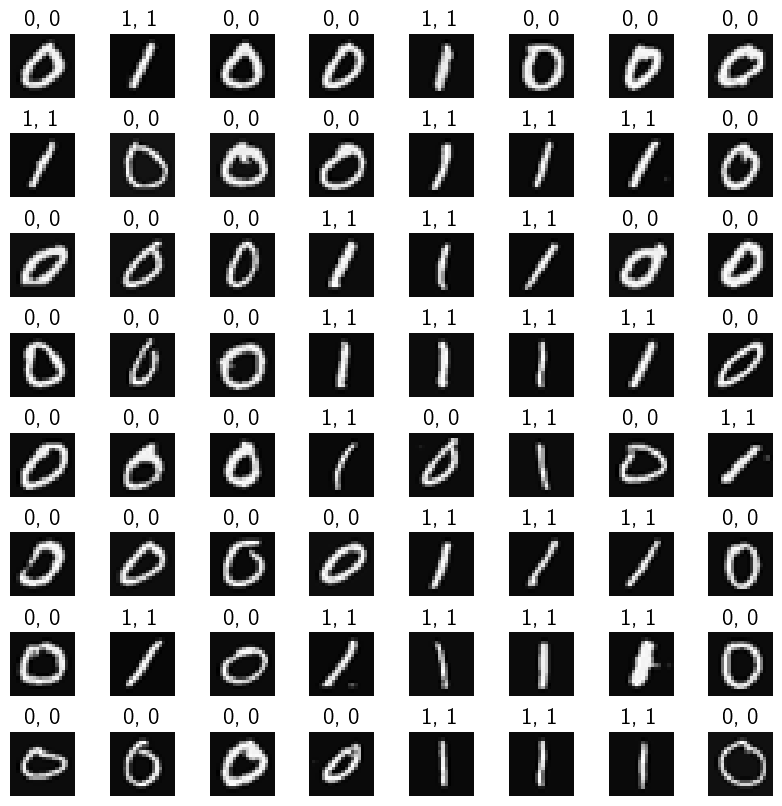

In [115]:
m,_ = X.shape


fig, ax = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)
for a in ax.flat:
    random_index = np.random.randint(m)# pick a random training data
    X_random = X[random_index].reshape((20,20)).T
    a.imshow(X_random, cmap='gray')
    prob = 0
    p = model.predict(Xn[random_index].reshape(1,400),verbose = 0)
    if p >= 0.5:
        prob = 1
        
    a.set_title(f"{y[random_index]}, {prob}")
    a.set_axis_off()
